In [1]:
import skimage
import skimage.io
import os, sys
import utils
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

## Read in male and female face aligend 50 coeficients

In [3]:
mdict = scipy.io.loadmat("LDA_Aligned_Eigen_Face_Coef.mat")
male_coef_face = mdict["male_coef"]
female_coef_face = mdict["female_coef"]

## Read in male and famal landmark coeficients

In [5]:
mdict = scipy.io.loadmat("LDA_Eigen_Warping_Coef.mat")
male_coef_LM = mdict["male_coef"]
female_coef_LM = mdict["female_coef"]

## Train Test split

In [7]:
train_male_face= male_coef_face[:330, :]
train_female_face = female_coef_face[:470, :]
train_male_LM = male_coef_LM[:330, :]
train_female_LM = female_coef_LM[:470, :]

test_male_face = male_coef_face[330:]
test_female_face = female_coef_face[470:]
test_male_LM = male_coef_LM[330:, :]
test_female_LM = female_coef_LM[470:, :]

## Calculate fisher face (appearance)

In [8]:
male_mean_face = np.expand_dims(np.mean(train_male_face, axis = 0), axis = 0)
female_mean_face = np.expand_dims(np.mean(train_female_face, axis = 0), axis = 0)

In [9]:
Sw_face = np.matmul((train_male_face - male_mean_face).T, (train_male_face - male_mean_face)) + \
    np.matmul((train_female_face - female_mean_face).T, (train_female_face - female_mean_face))

In [10]:
w_face = np.matmul(np.linalg.inv(Sw_face), (male_mean_face - female_mean_face).T)

## Calculate fisher face (geometry)

In [11]:
male_mean_LM = np.expand_dims(np.mean(train_male_LM, axis = 0), axis = 0)
female_mean_LM = np.expand_dims(np.mean(train_female_LM, axis = 0), axis = 0)

In [12]:
Sw_LM = np.matmul((train_male_LM - male_mean_LM).T, (train_male_LM - male_mean_LM)) + \
    np.matmul((train_female_LM - female_mean_LM).T, (train_female_LM - female_mean_LM))

In [13]:
w_LM = np.matmul(np.linalg.inv(Sw_LM), (male_mean_LM - female_mean_LM).T)

## Try on test set

In [14]:
male_face_ans = np.matmul(test_male_face, w_face)
male_LM_ans = np.matmul(test_male_LM, w_LM)

In [17]:
female_face_ans = np.matmul(test_female_face, w_face)
female_LM_ans = np.matmul(test_female_LM, w_LM)

## Plot the graph

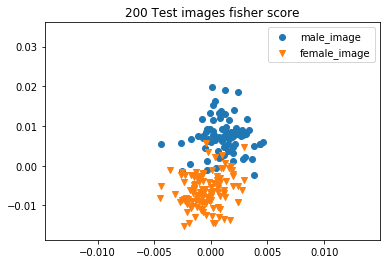

In [19]:
fig = plt.figure()
plt.clf()
plt.scatter(male_LM_ans, male_face_ans, marker = 'o', label = "male_image")
plt.scatter(female_LM_ans, female_face_ans, marker = 'v', label = "female_image")
plt.xlim(-)
plt.title("200 Test images fisher score")
plt.legend()
plt.show()
# fig.savefig("11_200_test_fisher_score.png")